# ML REGRESSION TASK
# GROUP 11
# 110740 Mwandware Dalton Zai
# 110855 Odhiambo Wesley Joel 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 

from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.linear_model import LassoCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.models import Model
 
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from google.colab import files
uploads=files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex.csv


In [ ]:
ds=pd.read_csv('Nairobi Office Price Ex.csv')

In [ ]:
nominal = ['LOC','FUR','WATER','HK_SER']
ordinal = ['AMB','PROX_SCH','PROX_ROAD','PROX_MALL']
numerical = ['SIZE']
target = ['PRICE']

In [ ]:
# Encoding

In [ ]:
for col in ordinal:
  label_encoder = LabelEncoder()
  new_col = label_encoder.fit_transform(ds[col])
  ds[col] = new_col

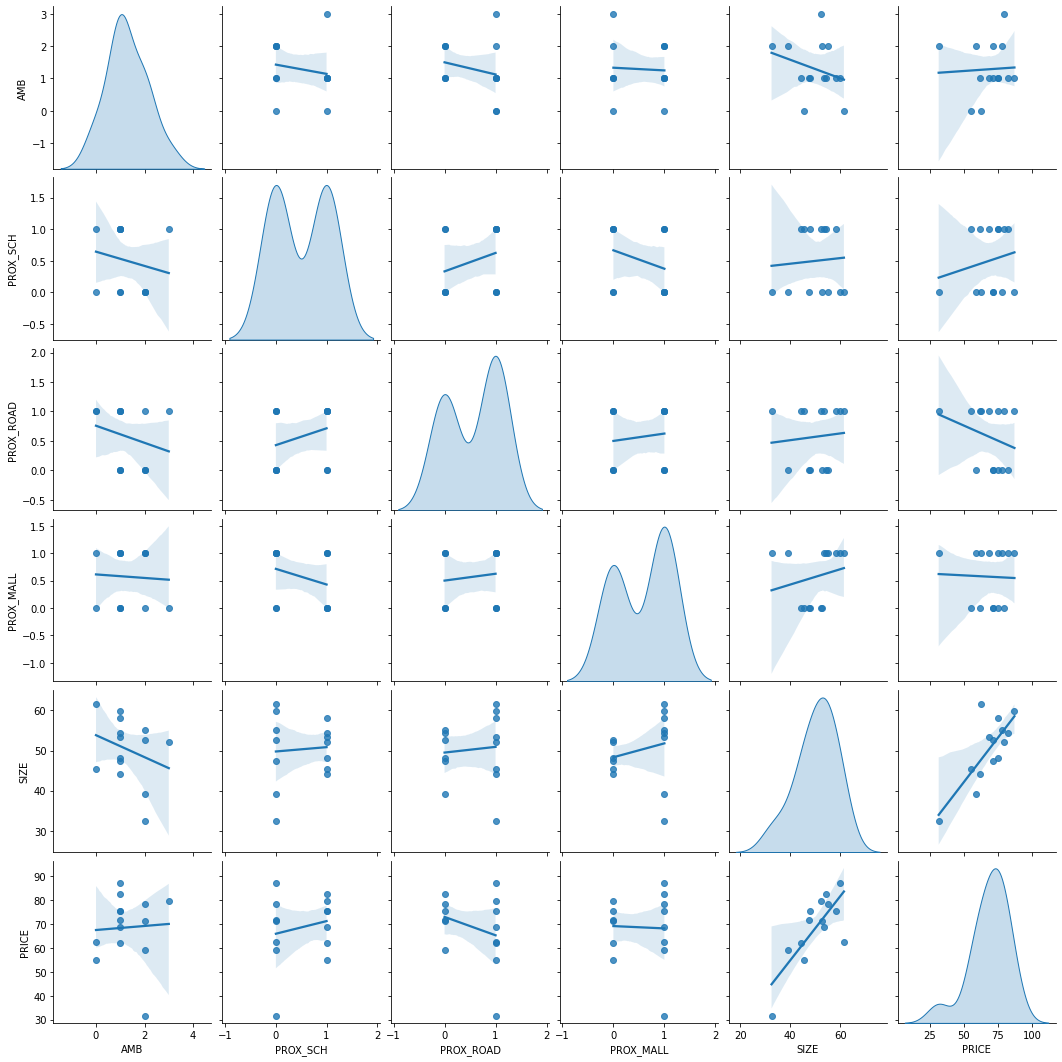

In [ ]:
sb.pairplot(ds, kind='reg', diag_kind='kde')

In [ ]:
dummies = pd.get_dummies(ds[nominal])
ds = pd.concat([dummies, ds], axis=1)
ds.drop(nominal, axis=1, inplace=True)

In [ ]:
transformer = PowerTransformer()
transformed_ds = transformer.fit_transform(ds)
ds = pd.DataFrame(transformed_ds, columns=ds.columns)


Lasso Reguralization

In [ ]:
y=ds["PRICE"]
x=ds.drop("PRICE", axis=1)
y

0    -2.060592
1    -0.178865
2    -0.673078
3     0.069057
4     1.827632
5     0.740273
6     0.898605
7    -0.908206
8     0.436974
9     0.046338
10   -1.156423
11    1.228105
12   -0.713071
13    0.443250
Name: PRICE, dtype: float64

In [ ]:
l_cv=LassoCV()
l_cv.fit(x,y)
indices=[i for i, x in enumerate(l_cv.coef_) if x != 0]
print(f'Selected cols: {len(indices)} of {len(l_cv.coef_)}')
print(f'Cols: {x.columns[indices]}')

Selected cols: 3 of 16
Cols: Index(['FUR_no', 'FUR_yes', 'SIZE'], dtype='object')


L1 Embedding

In [ ]:
new_columns = x.columns[indices]
x = x[new_columns]
X_ds = x.to_numpy()
y_ds = y.to_numpy()

In [ ]:
@tf.function
def ANN() -> Model:
  I = Input(shape=(3,))
  x = Dense(64, activation='relu')(I)
  x = Dense(32, activation='relu')(x)
  x = Dense(1)(x)
  return Model(I, x)  

model = ANN()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics='mae')
early_stopping = EarlyStopping(patience=2, monitor='loss')
history = model.fit(X_ds[:-5], y_ds[:-5], batch_size=15, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3148 - mae: 0.8800
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.8806 - mae: 0.7287
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7463 - mae: 0.6485
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6901 - mae: 0.6388
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6338 - mae: 0.6142
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5972 - mae: 0.5906
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.5777 - mae: 0.5909
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5661 - mae: 0.5928
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 0.5496 - mae: 0.5780
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5178 - mae: 0.5571
Epoch 11/100
1/1 [==============================] - 0s 32ms/step - loss

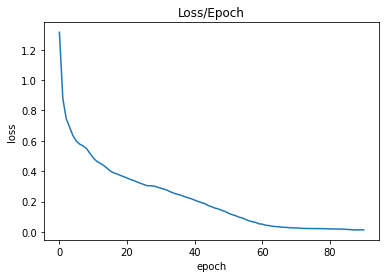

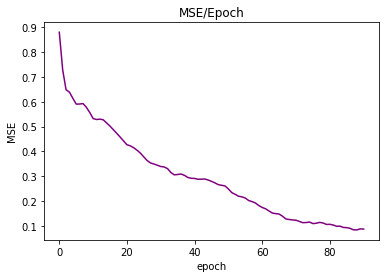

In [ ]:
plt.plot(history.history["loss"])
plt.title('Loss/Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print('\n')
plt.plot(history.history["mae"], color="purple")
plt.title('MSE/Epoch')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [ ]:
eval_history = model.evaluate(X_ds, y_ds, batch_size=15)
print(f'Loss: {eval_history[0]}, MAE: {eval_history[1]} ')

In [ ]:
X_predict = X_ds[-5: ]
y_true = y_ds[-5: ]
P = model.predict(X_predict).squeeze()
print(f'True vals:\n{y_true}\nvs.\nPredicted vals:\n{P}')

In [ ]:
X = ['R1', 'R2', 'R3', 'R4', 'R5']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y_true, 0.4, label = 'Init Value', color='black')
plt.bar(X_axis + 0.2, P, 0.4, label = 'Prediction', color='red')
plt.xticks(X_axis, X)
plt.xlabel("Records")
plt.ylabel("New Prices")
plt.title("Comparison between initial & model prediction values")
plt.legend()
plt.show()